In [4]:
library(ggplot2)
library(gcookbook)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



### 데이터 분포
- 히스토그램 : 연속형 변수에 대한 count 해주는 거, bar형태로 나타내기
- 밀도함수 : 히스토그램을 bar형태가 아닌 부드러운 curve 형태로 나타내기
- 박스플롯 

In [5]:
head(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


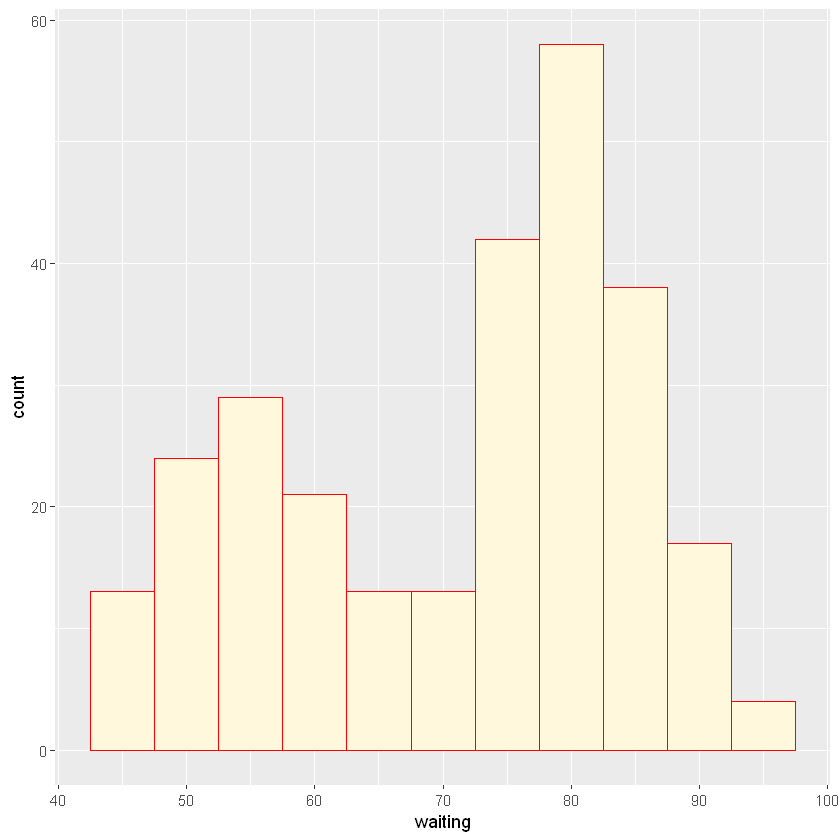

In [6]:
ggplot(faithful,  aes(x = waiting)) + geom_histogram(fill = 'cornsilk', color = 'red',
                                                    binwidth = 5)

In [7]:
library(MASS)
head(birthwt)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



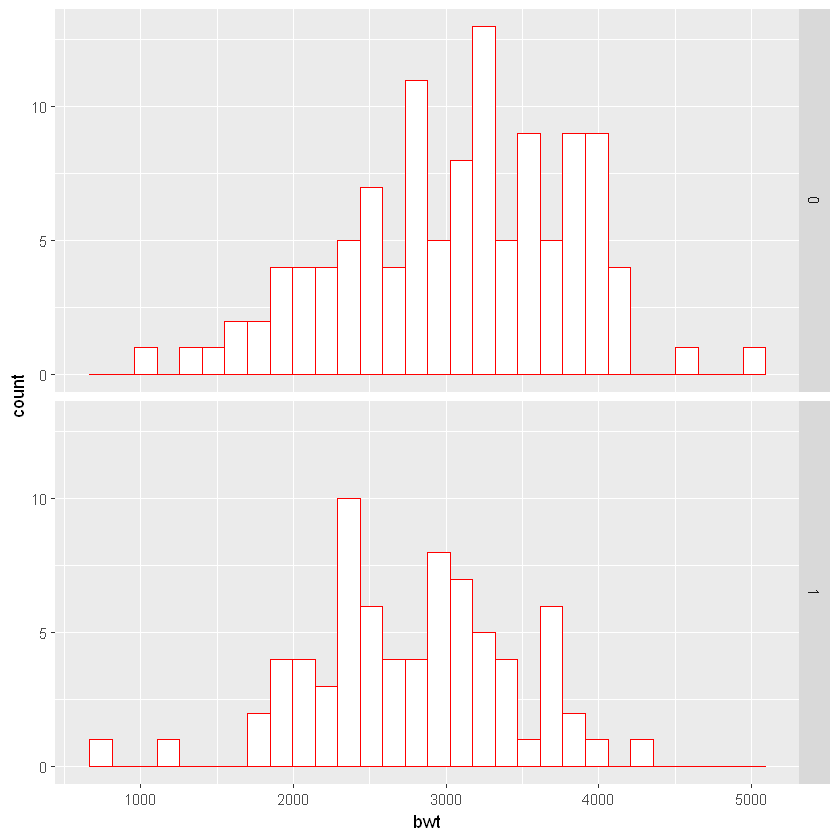

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



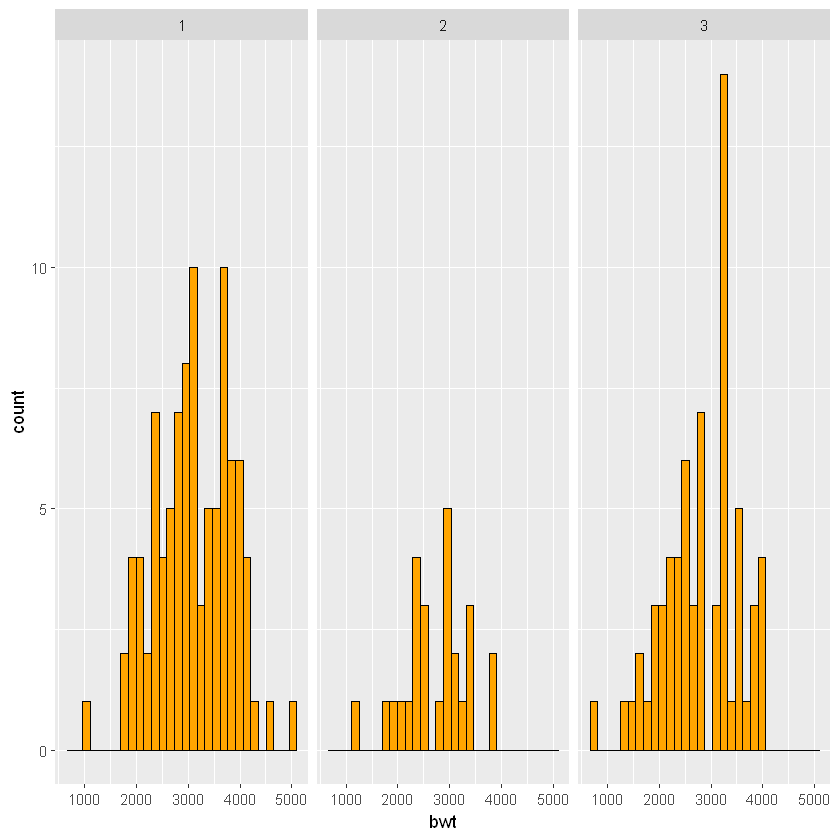

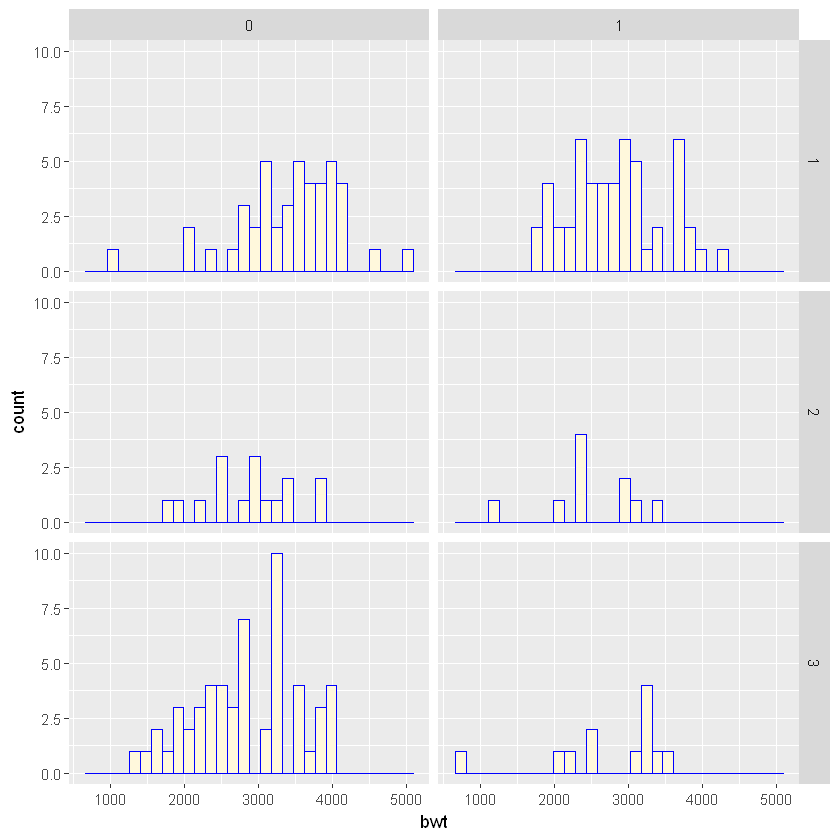

In [8]:
# facet_grid(smoke ~ .) : 두 개의 범주로 나눠서 그리기, 변수 smoke의 레벨별로 ggplot 
# 흡연 유무(바이너리)에 따라 다르게 그리고 싶다
# 물결 왼쪽은 행으로 나눠서
# 물결 오른쪽은 열로 나눠서

# 흡연 여부에 따른 분포
ggplot(birthwt, aes(x = bwt)) + geom_histogram(fill = 'white', color = 'red') +
  facet_grid(smoke~.)

# 인종에 따른 분포
ggplot(birthwt, aes(x = bwt)) + geom_histogram(fill = 'orange', color = 'black') +
    facet_grid(.~race)


# 인종과 흡연 여부에 따른 분포
# 열 구분이 인종
ggplot(birthwt, aes(x = bwt)) + geom_histogram(fill = 'cornsilk', color = 'blue') +
    facet_grid(race ~smoke)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



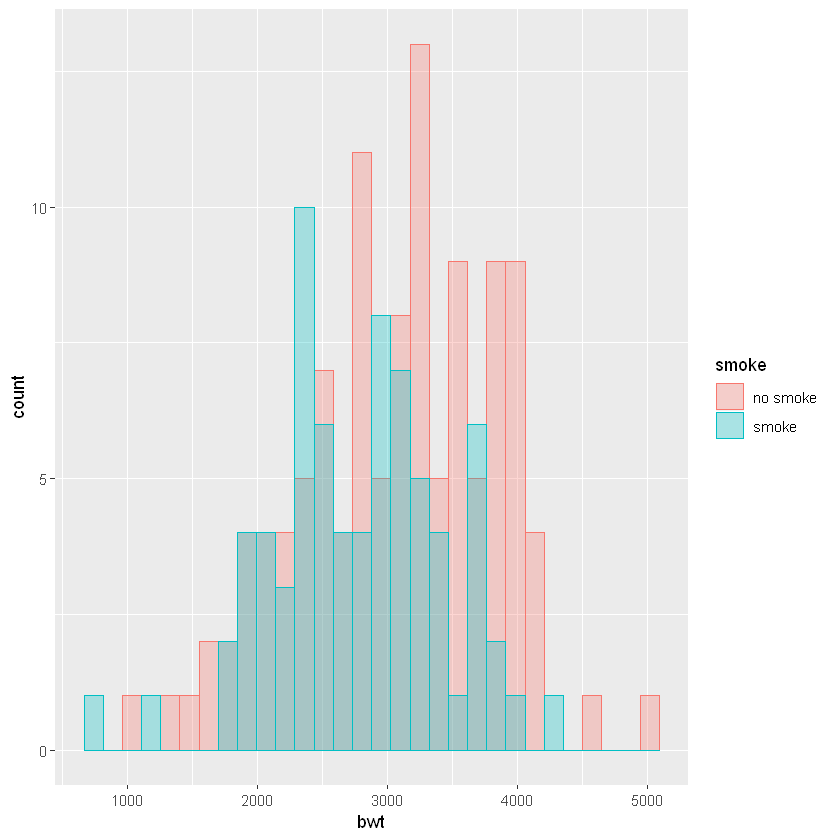

In [11]:
# 한 플롯에다 겹쳐 그리기
# geom_histogram(position = ‘identity’)하면 변수 smoke의 두 레벨에 대응하는 히스토그램이 겹쳐서 그려짐
# 구간을 나눠서 개수를 파악하는 히스토그램 -> 분포를 볼 수 있다
birthwt_copy <- birthwt
birthwt_copy$smoke <- factor(birthwt_copy$smoke, levels = c(0, 1), labels = c('no smoke', 'smoke'))

ggplot(birthwt_copy, aes(x = bwt, fill = smoke, color = smoke)) +
  geom_histogram(position = 'identity', alpha = 0.3)

### Density curve
- 부드러운 형태의 히스토그램으로 분포를 파악할 수 있음

In [12]:
head(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


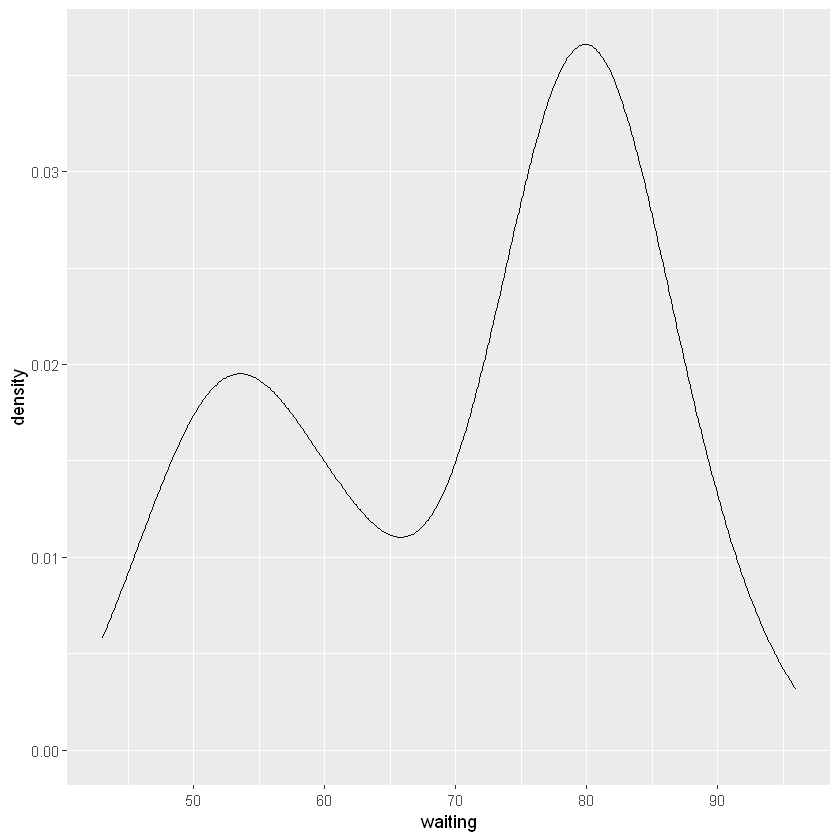

In [13]:
# geom_density() : 연속형 변수에 대한 density curve를 폐곡선으로 그림.
# geom_line(stat = ‘density’) : 연속형 변수에 대한 density curve를 아래가 열린 그림으로 그림.
# expand_limits(y = 0) : y축의 범위를 0부터 시작하도록 함.
# waiting time에 대해서 밀도함수
# 어디가 밀도가 가장 높은지 확인할 수 있다...
ggplot(faithful, aes(x = waiting)) + geom_line(stat = 'density') +
    expand_limits(y = 0)

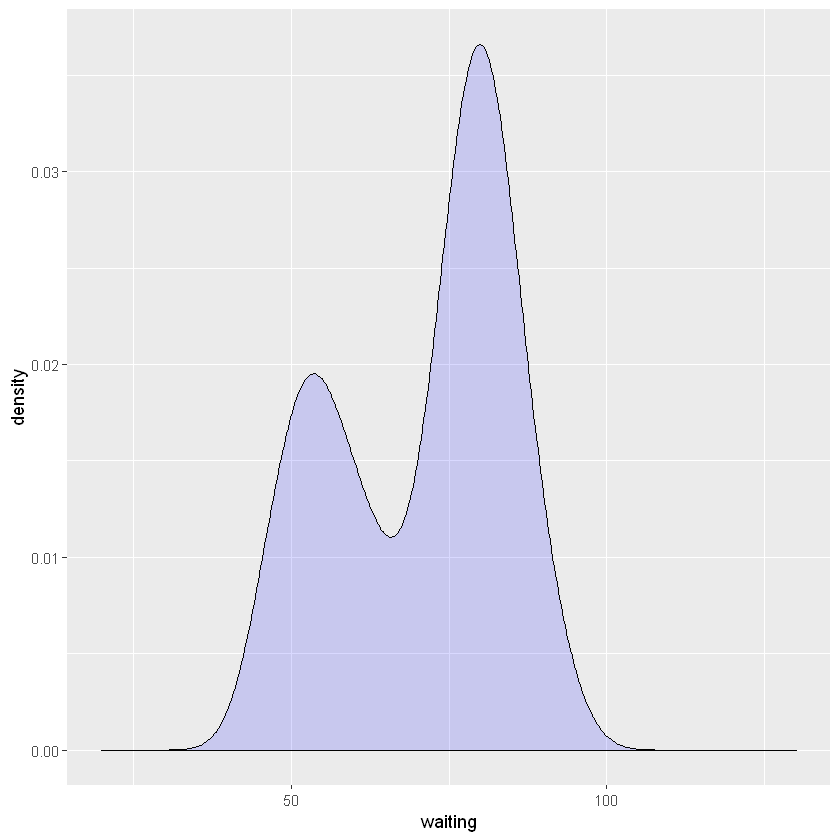

In [14]:
#geom_density() 및 geom_line()을 조합하여 density plot의 아랫부분의 선을 없애는 예시.
#geom_density() 함수 내부에 fill = ‘blue’는 density curve 아래영역 색상을 blue로 정하고 
#geom_line(stat = ‘density’) 함수는 density 곡선을 검정색으로 표현함.
# xlim(20, 130) : x축의 범위를 35에서 105 사이에 그려지도록 함.
ggplot(faithful, aes(x = waiting)) + 
    geom_density(fill = 'blue', color = 'black', alpha = 0.15) +
    geom_line(stat = 'density') + 
    xlim(20, 130) # -> 위의 플롯은 x축이 짤림(데이터를 다 담지 못해) 따라서 x축 범위 설정해서 모든 데이터 다 보이게 확인할 수 있다

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1 rows containing missing values (geom_bar)."


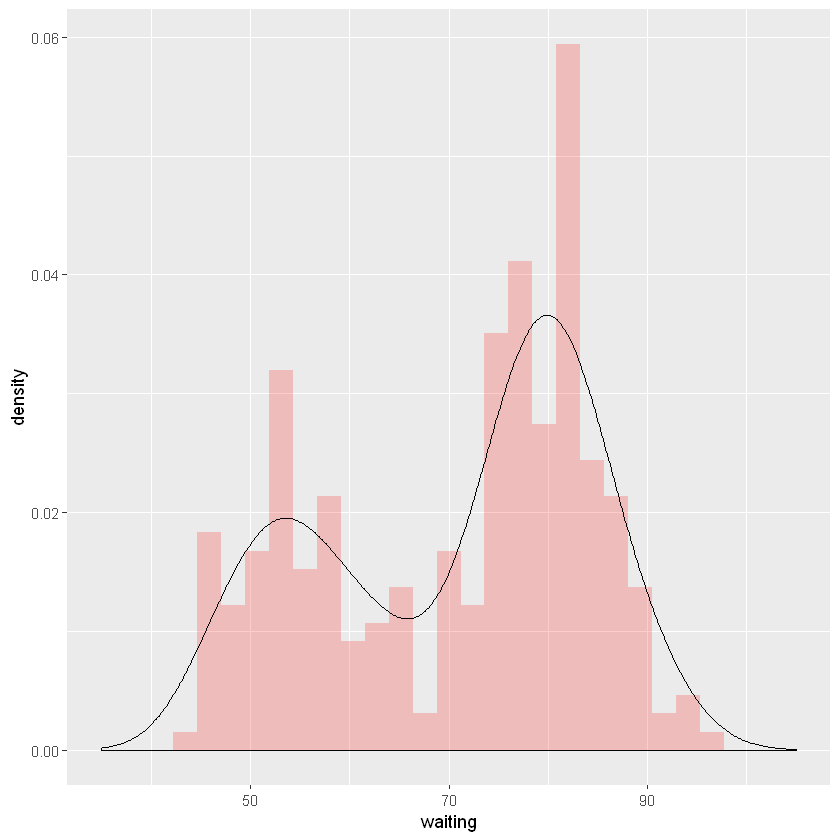

In [15]:
## geom_histogram() 과 geom_density() 를 동시에 적용함으로써 히스토그램과 density 곡선을 동시에 그림.
## ..density.. 는 geom_density() 가 수행되면서 내부적으로 생성되는 density function 값을 저장한 내부변수임.

# 히스토그램과 경향선을 보는 커브를 같이 플로팅
# desity는 밀도를 추정하는 거임
# y축을 상대도수로 바꿔줌(scale이 달라짐)
ggplot(faithful, aes(x = waiting, y = ..density..)) +
    geom_histogram(fill = 'red', alpha = 0.2) +
    geom_density() + xlim(35, 105)

#### data를 grouping 해서 density plot

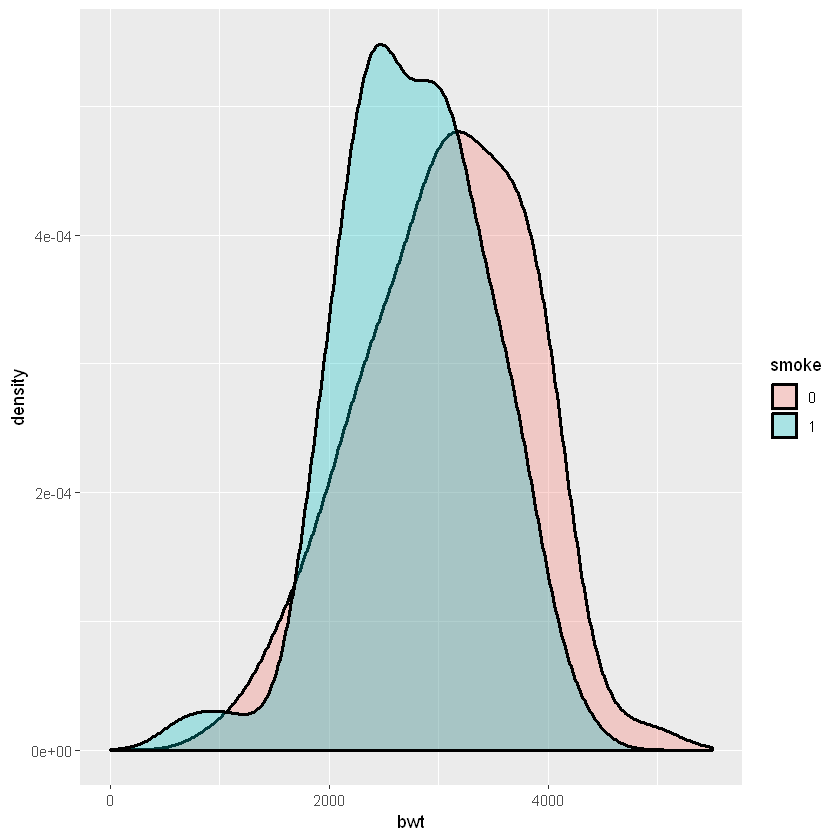

In [16]:
birthwt1 <- birthwt
birthwt1$smoke <- factor(birthwt1$smoke)

ggplot(birthwt1, aes(x = bwt, fill= smoke)) +
    geom_density(alpha = 0.3, size = 1) + xlim(0,5500) 

### Box plot

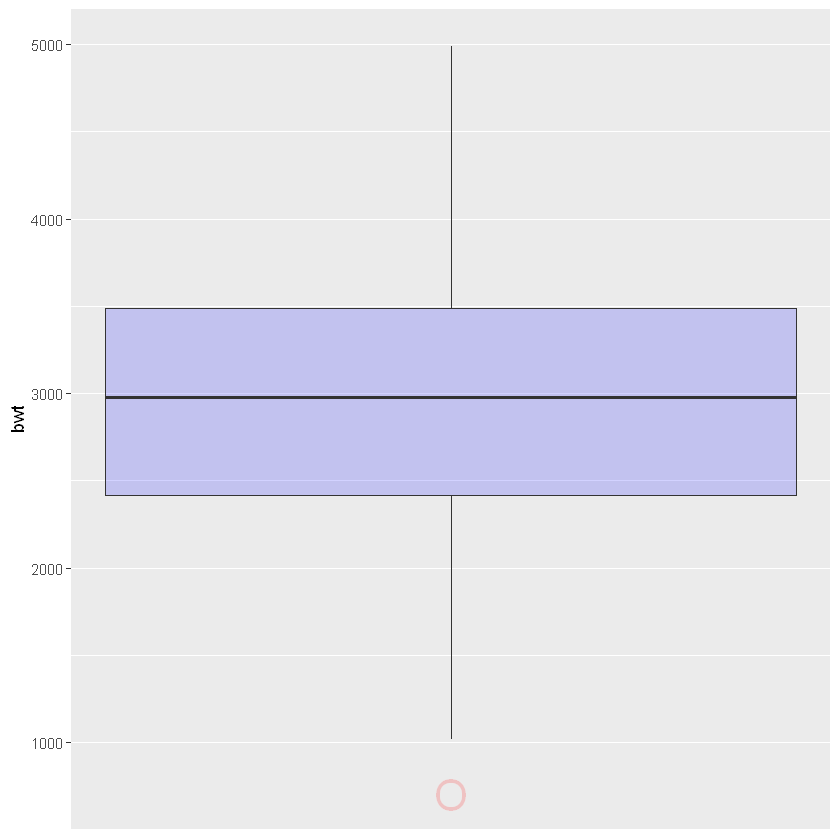

In [17]:
# 전체적인 상자그림
ggplot(birthwt_copy, aes(y = bwt)) + geom_boxplot(width = 0.6, fill = 'blue', alpha = 0.17777,
                                                 outlier.size = 9, outlier.shape = 'O', outlier.color = 'red' ) +
    scale_x_continuous(breaks = NULL) +
    theme(axis.title.x = element_blank())

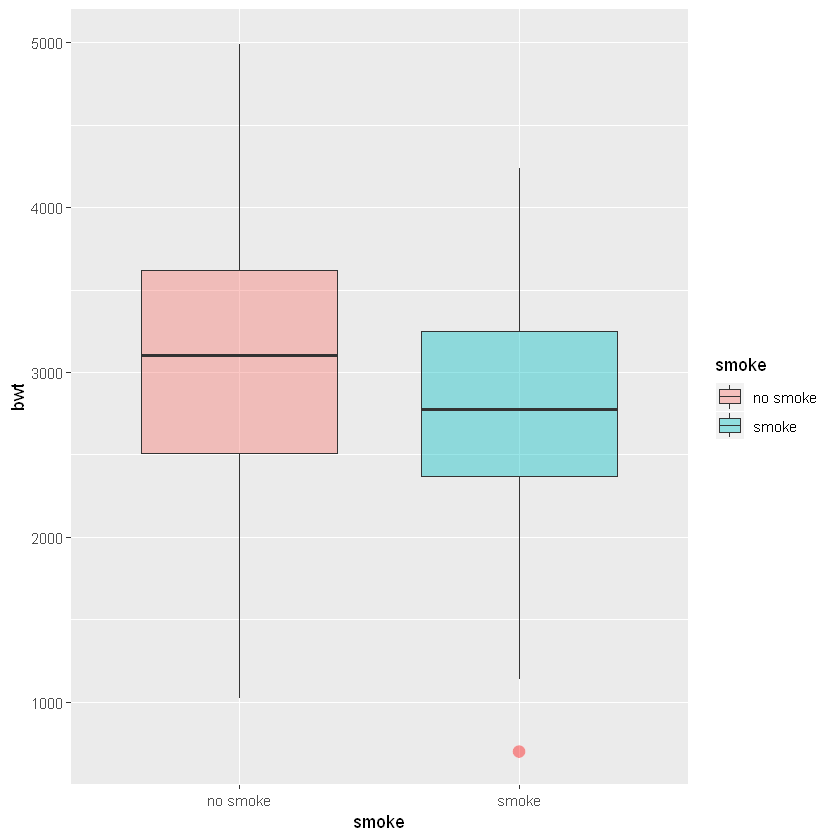

In [18]:
# 흡연여부 레벨 0, 1을, label 범주형으로 나눠주고,
# 흡연여부에 따른 몸무게의 분포를 그려줌
ggplot(birthwt_copy, aes(x = smoke, y = bwt, fill = smoke)) + 
     geom_boxplot(alpha = 0.4, width = 0.7,
                 outlier.size = 6, outlier.shape = '●', outlier.color = 'red')

### 2차원 Dot plot
- 클러스터링 형태 분포 파악하기

In [19]:
head(faithful)

eruptions,waiting
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


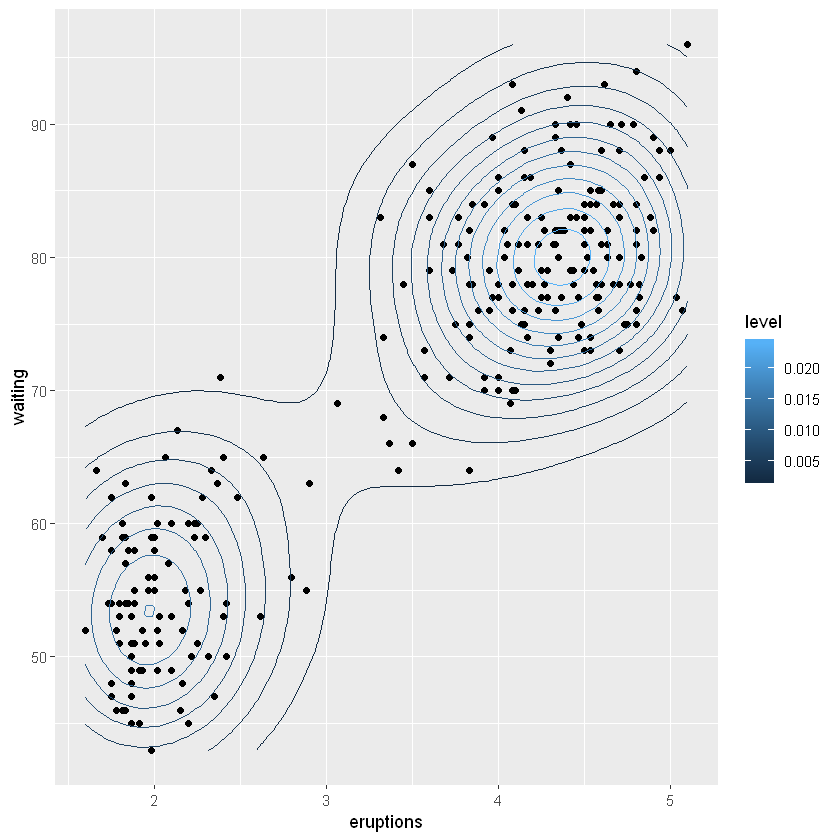

In [22]:
ggplot(faithful, aes(x = eruptions, y = waiting)) +
    geom_point() + stat_density2d(aes(color = ..level..))